# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jordandass/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
load_dotenv("/Users/Jordandass/newsapi.env")
api_key = os.getenv("NEWS_API_KEY")
print(api_key)


ba3b1fafce124c889829475792d636d2


In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q='bitcoin')

In [8]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q='ethereum')

In [13]:
bitcoin['articles']

[{'source': {'id': 'wired', 'name': 'Wired'},
  'author': 'Gian M. Volpicelli',
  'title': 'As Kazakhstan Descends into Chaos, Crypto Miners Are at a Loss',
  'description': 'The central Asian country became No. 2 in the world for Bitcoin mining. But political turmoil and power cuts have hit hard, and the future looks bleak.',
  'url': 'https://www.wired.com/story/kazakhstan-cryptocurrency-mining-unrest-energy/',
  'urlToImage': 'https://media.wired.com/photos/61de2d453e654a13e9a16ef0/191:100/w_1280,c_limit/Business_Kazakhstan-2HDE52K.jpg',
  'publishedAt': '2022-01-12T12:00:00Z',
  'content': 'When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]'},
 {'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Mitchell Clark',
  'title': 'The International Monetary Fund tells El Salvador it shouldn’t use Bitcoin as legal 

In [15]:
# Sentiment scores dictionaries
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    if -0.5 < score < 0.5:
        return 0
    elif score <= -0.5:
        return -1
    elif score >= 0.5:
        return 1
    
title_sent, text_sent, dataframes_list = [], [], []
# Get sentiment for the text and the title
for all_articles in [bitcoin, ethereum]:
    articles = all_articles['articles']
    for article_dict in articles:
        for type_text in ['title', 'description']:
        # Sentiment scoring with VADER
            sentiment = analyzer.polarity_scores(article_dict[type_text])
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sent = get_sentiment(compound)

            if type_text == 'title':
                title_sent.append({
            "title_compound": compound,
            "title_pos": pos,
            "title_neu": neu,
            "title_neg": neg,
            "title_sent": sent,})
            else:
                text_sent.append({
            "text_compound": compound,
            "text_pos": pos,
            "text_neu": neu,
            "text_neg": neg,
            "text_sent": sent,})

    # Attaching sentiment columns to the News DataFrame
    title_df = pd.DataFrame(title_sent)
    text_df = pd.DataFrame(text_sent)
    title_text_df = pd.concat([title_df, text_df], axis = 'columns', join = 'inner')
    dataframes_list.append(title_text_df)


In [16]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sent = dataframes_list[0]
bitcoin_sent

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,-0.7184,0.000,0.571,0.429,-1,-0.8047,0.000,0.704,0.296,-1
1,0.1280,0.103,0.897,0.000,0,0.0258,0.088,0.853,0.059,0
2,-0.0258,0.204,0.584,0.212,0,0.3182,0.133,0.793,0.074,0
3,-0.0258,0.000,0.879,0.121,0,-0.4404,0.000,0.865,0.135,0
4,-0.2500,0.193,0.526,0.281,0,-0.2023,0.094,0.781,0.125,0
5,-0.2500,0.115,0.692,0.192,0,0.5994,0.104,0.896,0.000,1
6,-0.4404,0.000,0.805,0.195,0,-0.4404,0.000,0.932,0.068,0
7,0.3818,0.271,0.729,0.000,0,0.3818,0.094,0.906,0.000,0
8,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
9,0.0000,0.000,1.000,0.000,0,0.5267,0.317,0.577,0.106,1


In [17]:
# Create the Ethereum sentiment scores DataFrame
eth_sent = dataframes_list[1]
eth_sent

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,-0.7184,0.000,0.571,0.429,-1,-0.8047,0.000,0.704,0.296,-1
1,0.1280,0.103,0.897,0.000,0,0.0258,0.088,0.853,0.059,0
2,-0.0258,0.204,0.584,0.212,0,0.3182,0.133,0.793,0.074,0
3,-0.0258,0.000,0.879,0.121,0,-0.4404,0.000,0.865,0.135,0
4,-0.2500,0.193,0.526,0.281,0,-0.2023,0.094,0.781,0.125,0
5,-0.2500,0.115,0.692,0.192,0,0.5994,0.104,0.896,0.000,1
6,-0.4404,0.000,0.805,0.195,0,-0.4404,0.000,0.932,0.068,0
7,0.3818,0.271,0.729,0.000,0,0.3818,0.094,0.906,0.000,0
8,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
9,0.0000,0.000,1.000,0.000,0,0.5267,0.317,0.577,0.106,1


In [31]:
# Describe the Bitcoin Sentiment
bitcoin_sent.describe()


,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.109380,0.083250,0.783500,0.133200,-0.050000,-0.016530,0.082000,0.838750,0.079250,0.100000
std,0.334077,0.104758,0.180724,0.156502,0.394034,0.436679,0.096901,0.115041,0.078325,0.552506
min,-0.872000,0.000000,0.526000,0.000000,-1.000000,-0.804700,0.000000,0.577000,0.000000,-1.000000
25%,-0.250000,0.000000,0.638750,0.000000,0.000000,-0.388800,0.000000,0.781750,0.000000,0.000000
50%,-0.012900,0.000000,0.767000,0.060500,0.000000,0.000000,0.064500,0.859000,0.071000,0.000000
75%,0.000000,0.155500,1.000000,0.222500,0.000000,0.334100,0.111250,0.912500,0.126250,0.000000
max,0.526700,0.298000,1.000000,0.474000,1.000000,0.648600,0.317000,1.000000,0.296000,1.000000


In [32]:
# Describe the Ethereum Sentiment
eth_sent.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,-0.142963,0.050375,0.825700,0.123925,-0.050000,0.011677,0.086250,0.838400,0.075350,0.075000
std,0.282062,0.088798,0.175062,0.144558,0.316228,0.390104,0.098445,0.145406,0.089513,0.474342
min,-0.872000,0.000000,0.526000,0.000000,-1.000000,-0.804700,0.000000,0.455000,0.000000,-1.000000
25%,-0.297600,0.000000,0.686000,0.000000,0.000000,-0.220025,0.000000,0.781000,0.000000,0.000000
50%,0.000000,0.000000,0.849500,0.000000,0.000000,0.000000,0.050000,0.866500,0.061000,0.000000
75%,0.000000,0.106000,1.000000,0.227500,0.000000,0.323650,0.112750,0.948000,0.126250,0.000000
max,0.526700,0.298000,1.000000,0.474000,1.000000,0.757900,0.317000,1.000000,0.296000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin for title and Eth for descriptions

Q: Which coin had the highest compound score?

A: Bitcoin and Ethereum are tied for highest compound score for titles, but Eth exceeds in descriptions

Q. Which coin had the highest positive score?

A: Bitcoin and Ethereum are tied for highest compound score for titles and descriptions

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [33]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [35]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
import nltk
nltk.download('stopwords')
stops = list(set(stopwords.words('english')))

# Expand the default stopwords list if necessary


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordandass/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    text_list = re.findall('\w+', text)
    # Lemmatize words into root words, Convert the words to lowercase, Remove the stop words
    tokens = [lemmatizer.lemmatize(word.lower()) for word in text_list if word.lower() not in stops]
    return tokens

tokenizer('My, name is Jordan. Nice to meet you!')

['name', 'jordan', 'nice', 'meet']

In [74]:
token_dataframes = []
words_dict = {}
for all_articles, name in zip([bitcoin, ethereum], ['bitcoin', 'ethereum']):
    articles = all_articles['articles']
    
    rows, title_list, text_list = [], [] ,[]
    for article_dict in articles:
        title_token = tokenizer(article_dict['title'])
        title_list.append(title_token)
        
        text_token = tokenizer(article_dict['description'])
        text_list.append(text_token)
        
        rows.append([title_token, text_token])
    df = pd.DataFrame(rows, columns = [f'{name}_title', f'{name}_description'])
    token_dataframes.append(df)
    
    words_dict[f'{name}_title'] = title_list
    words_dict[f'{name}_text'] = text_list

In [75]:
# Create a new tokens column for Bitcoin
bitcoin_token = token_dataframes[0]
bitcoin_token

,bitcoin_title,bitcoin_description
0,"[kazakhstan, descends, chaos, crypto, miner, l...","[central, asian, country, became, 2, world, bi..."
1,"[international, monetary, fund, tell, el, salv...","[international, monetary, fund, executive, dir..."
2,"[jack, dorsey, block, working, make, bitcoin, ...","[block, working, building, open, bitcoin, mini..."
3,"[deepdotweb, operator, sentenced, eight, year,...","[operator, deepdotweb, site, indexed, dark, ne..."
4,"[crypto, com, admits, 30, million, stolen, hac...","[cryptocurrency, exchange, crypto, com, said, ..."
5,"[bitcoin, extends, slide, fallen, 50, record, ...","[bitcoin, largest, digital, asset, extended, d..."
6,"[block, officially, building, open, bitcoin, m...","[block, founder, jack, dorsey, announced, twit..."
7,"[musk, say, tesla, accept, dogecoin, merchandise]","[table, tr, td, td, tr, tr, td, representation..."
8,"[eric, adam, taking, first, paycheck, crypto]","[mr, adam, want, new, york, city, become, glob..."
9,"[gibraltar, could, launch, world, first, crypt...","[rock, hope, new, stock, exchange, attract, cr..."


In [76]:
# Create a new tokens column for Ethereum
eth_token = token_dataframes[1]
eth_token

,ethereum_title,ethereum_description
0,"[crypto, com, admits, 30, million, stolen, hac...","[cryptocurrency, exchange, crypto, com, said, ..."
1,"[hacker, launder, 15, million, stolen, crypto,...","[hacker, made, roughly, 15, million, ethereum,..."
2,"[eric, adam, taking, first, paycheck, crypto]","[mr, adam, want, new, york, city, become, glob..."
3,"[robinhood, open, cryptocurrency, wallet, beta...","[back, september, robinhood, announced, plan, ..."
4,"[crypto, com, finally, acknowledges, 34, milli...","[trading, platform, crypto, com, lost, 34, mil..."
5,"[looksrare, reportedly, generated, 8b, ethereu...","[looksrare, seemingly, came, nowhere, become, ..."
6,"[mine, ethereum, step, step, guide]","[ethereum, mining, lot, accessible, everything..."
7,"[2, meme, stock, beat, ethereum, 2021]","[investor, interest, growing, cryptocurrency, ..."
8,"[ethereum, inventor, want, replace, pregnant, ...","[crypto, bros, never, tire, sharing, utopian, ..."
9,"[crypto, exchange, shuts, withdrawal, hacker, ...","[crypto, com, issued, statement, multiple, use..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [77]:
from collections import Counter
from nltk import ngrams

In [101]:
bitcoin_title = words_dict['bitcoin_title']

bitcoin_text = words_dict['bitcoin_text']

eth_title = words_dict['ethereum_title']

eth_text = words_dict['ethereum_text']

In [102]:
# Generate the Bitcoin N-grams where N=2
ngram_list = []
for text_type in [bitcoin_title, bitcoin_text]:
    bitcoin_ngram = []
    for text in text_type:
        bitcoin_ngram += ngrams(text, n=2)
    bitcoin_ngram = Counter(bitcoin_ngram)
    ngram_list.append(bitcoin_ngram)

bitcoin_title_ngram = ngram_list[0]
bitcoin_text_ngram = ngram_list[1]

display(bitcoin_title_ngram)
display(bitcoin_text_ngram)

Counter({('kazakhstan', 'descends'): 1,
         ('descends', 'chaos'): 1,
         ('chaos', 'crypto'): 1,
         ('crypto', 'miner'): 1,
         ('miner', 'loss'): 1,
         ('international', 'monetary'): 1,
         ('monetary', 'fund'): 1,
         ('fund', 'tell'): 1,
         ('tell', 'el'): 1,
         ('el', 'salvador'): 2,
         ('salvador', 'use'): 1,
         ('use', 'bitcoin'): 1,
         ('bitcoin', 'legal'): 2,
         ('legal', 'tender'): 2,
         ('jack', 'dorsey'): 3,
         ('dorsey', 'block'): 1,
         ('block', 'working'): 1,
         ('working', 'make'): 1,
         ('make', 'bitcoin'): 1,
         ('bitcoin', 'mining'): 3,
         ('mining', 'easier'): 1,
         ('deepdotweb', 'operator'): 1,
         ('operator', 'sentenced'): 1,
         ('sentenced', 'eight'): 1,
         ('eight', 'year'): 1,
         ('year', 'money'): 1,
         ('money', 'laundering'): 1,
         ('crypto', 'com'): 2,
         ('com', 'admits'): 1,
         ('admits',

Counter({('central', 'asian'): 1,
         ('asian', 'country'): 1,
         ('country', 'became'): 1,
         ('became', '2'): 1,
         ('2', 'world'): 1,
         ('world', 'bitcoin'): 1,
         ('bitcoin', 'mining'): 4,
         ('mining', 'political'): 1,
         ('political', 'turmoil'): 1,
         ('turmoil', 'power'): 1,
         ('power', 'cut'): 1,
         ('cut', 'hit'): 1,
         ('hit', 'hard'): 1,
         ('hard', 'future'): 1,
         ('future', 'look'): 1,
         ('look', 'bleak'): 1,
         ('international', 'monetary'): 1,
         ('monetary', 'fund'): 1,
         ('fund', 'executive'): 1,
         ('executive', 'director'): 1,
         ('director', 'recommended'): 1,
         ('recommended', 'el'): 1,
         ('el', 'salvador'): 1,
         ('salvador', 'narrow'): 1,
         ('narrow', 'scope'): 1,
         ('scope', 'bitcoin'): 1,
         ('bitcoin', 'law'): 1,
         ('law', 'making'): 1,
         ('making', 'cryptocurrency'): 1,
         ('cr

In [103]:
# Generate the Ethereum N-grams where N=2
ngram_list = []
for text_type in [eth_title, eth_text]:
    eth_ngram = []
    for text in text_type:
        eth_ngram += ngrams(text, n=2)
    eth_ngram = Counter(eth_ngram)
    ngram_list.append(eth_ngram)

eth_title_ngram = ngram_list[0]
eth_text_ngram = ngram_list[1]

display(eth_title_ngram)
display(eth_text_ngram)

Counter({('crypto', 'com'): 4,
         ('com', 'admits'): 1,
         ('admits', '30'): 1,
         ('30', 'million'): 1,
         ('million', 'stolen'): 3,
         ('stolen', 'hacker'): 3,
         ('hacker', 'launder'): 1,
         ('launder', '15'): 1,
         ('15', 'million'): 1,
         ('stolen', 'crypto'): 1,
         ('com', 'using'): 1,
         ('using', 'ethereum'): 1,
         ('ethereum', 'mixer'): 1,
         ('eric', 'adam'): 2,
         ('adam', 'taking'): 1,
         ('taking', 'first'): 1,
         ('first', 'paycheck'): 2,
         ('paycheck', 'crypto'): 1,
         ('robinhood', 'open'): 1,
         ('open', 'cryptocurrency'): 1,
         ('cryptocurrency', 'wallet'): 1,
         ('wallet', 'beta'): 1,
         ('beta', 'tester'): 1,
         ('com', 'finally'): 1,
         ('finally', 'acknowledges'): 1,
         ('acknowledges', '34'): 1,
         ('34', 'million'): 2,
         ('looksrare', 'reportedly'): 1,
         ('reportedly', 'generated'): 1,
        

Counter({('cryptocurrency', 'exchange'): 1,
         ('exchange', 'crypto'): 1,
         ('crypto', 'com'): 5,
         ('com', 'said'): 1,
         ('said', '15'): 1,
         ('15', 'million'): 2,
         ('million', 'ethereum'): 2,
         ('ethereum', '18'): 1,
         ('18', 'million'): 1,
         ('million', 'bitcoin'): 1,
         ('bitcoin', 'stolen'): 1,
         ('stolen', 'hacker'): 1,
         ('hacker', 'security'): 1,
         ('security', 'breach'): 1,
         ('hacker', 'made'): 1,
         ('made', 'roughly'): 1,
         ('roughly', '15'): 1,
         ('ethereum', 'crypto'): 1,
         ('com', 'attempting'): 1,
         ('attempting', 'launder'): 1,
         ('launder', 'fund'): 1,
         ('fund', 'called'): 1,
         ('called', 'ethereum'): 1,
         ('ethereum', 'mixer'): 1,
         ('mixer', 'known'): 1,
         ('known', 'tornado'): 1,
         ('tornado', 'cash'): 1,
         ('cash', 'according'): 1,
         ('according', 'new'): 2,
         ('new

In [104]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [105]:
# Use token_count to get the top 10 words for Bitcoin
btc_title_token = []
for lists in bitcoin_title:
    btc_title_token += lists
    
btc_text_token = []
for lists in bitcoin_text:
    btc_text_token += lists    
    
display(token_count(btc_title_token))
display(token_count(btc_text_token))

[('crypto', 9), ('bitcoin', 8), ('mining', 5)]

[('bitcoin', 15), ('cryptocurrency', 12), ('tr', 12)]

In [106]:
# Use token_count to get the top 10 words for Ethereum
eth_title_token = []
for lists in eth_title:
    eth_title_token += lists
    
eth_text_token = []
for lists in eth_text:
    eth_text_token += lists    
    
display(token_count(eth_title_token))
display(token_count(eth_text_token))

[('crypto', 7), ('hacker', 6), ('ethereum', 6)]

[('ethereum', 12), ('crypto', 8), ('cryptocurrency', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

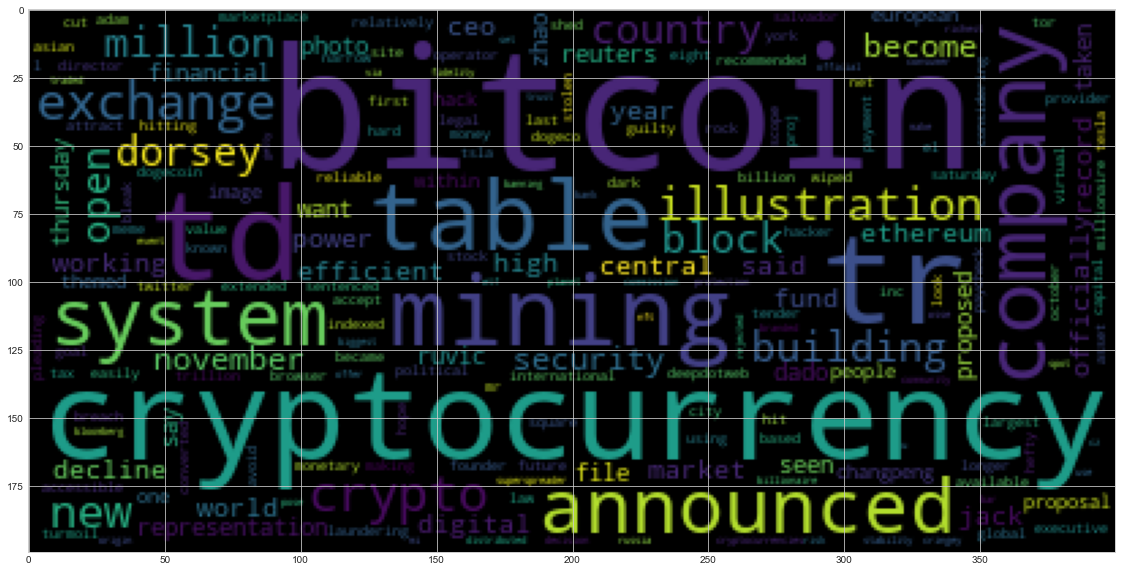

In [109]:
# Generate the Bitcoin word cloud
btc_wc_title = WordCloud().generate(' '.join(btc_title_token))
plt.imshow(btc_wc_title)

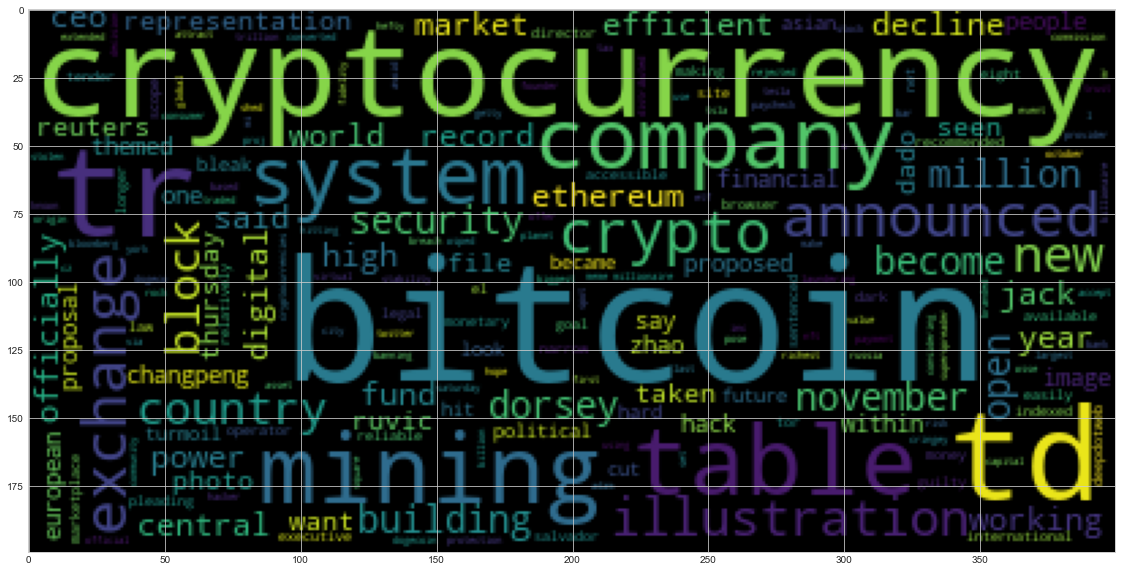

In [110]:
btc_wc_text= WordCloud().generate(' '.join(btc_text_token))
plt.imshow(btc_wc_text)

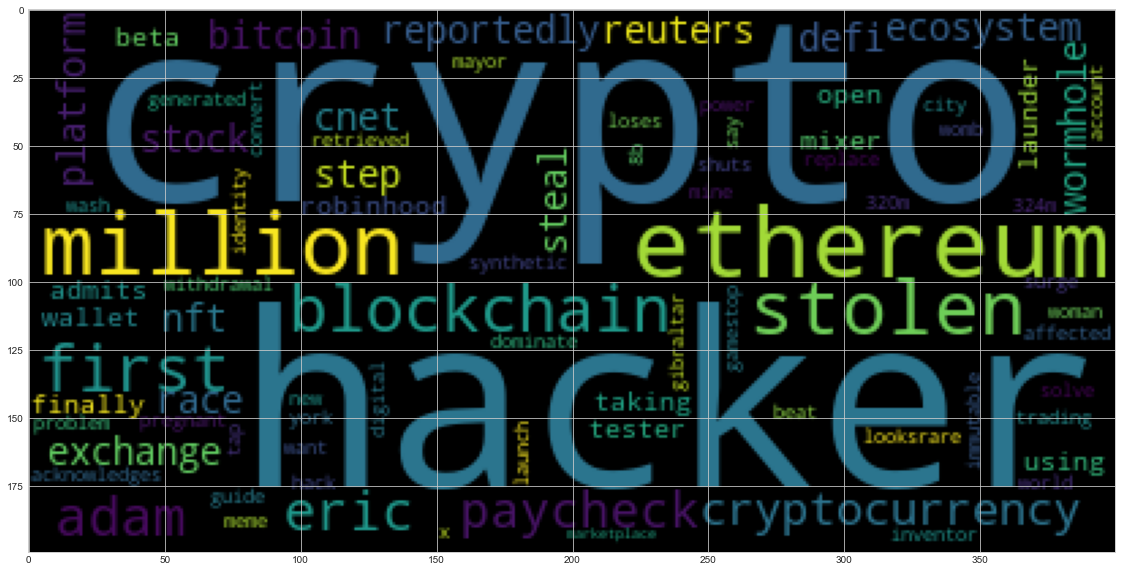

In [111]:
# Generate the Ethereum word cloud
eth_wc_title = WordCloud().generate(' '.join(eth_title_token))
plt.imshow(eth_wc_title)

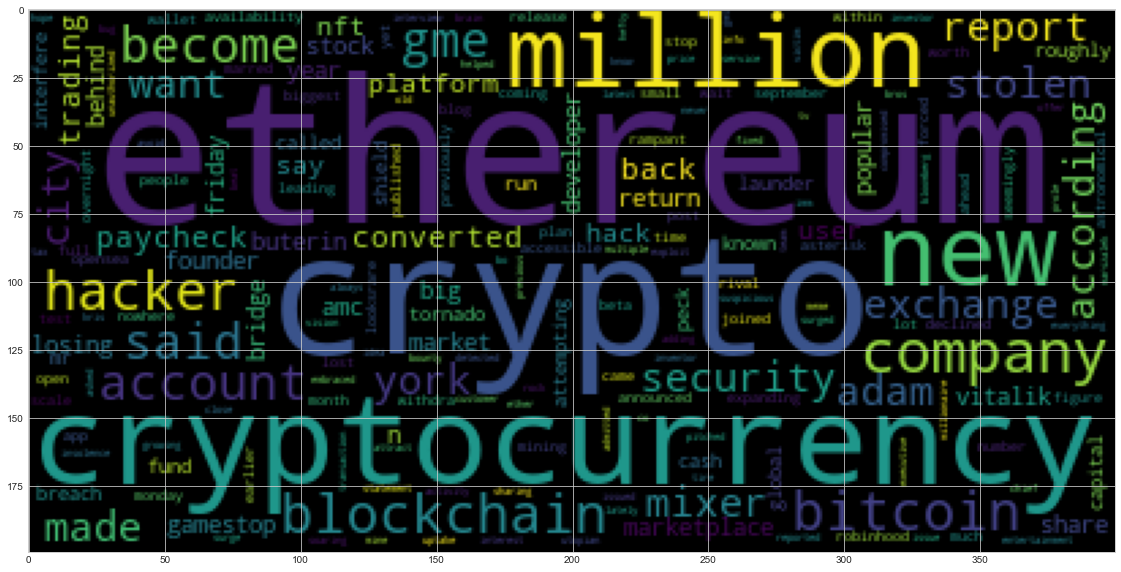

In [112]:
eth_wc_text= WordCloud().generate(' '.join(eth_text_token))
plt.imshow(eth_wc_text)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [113]:
import spacy
from spacy import displacy

In [114]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [115]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [120]:
# Concatenate all of the Bitcoin text together


In [126]:
# Run the NER processor on all of the text
doc_btc_title = nlp(' '.join(btc_title_token))
# Add a title to the document
# Render NER visualization with displacy
displacy.render(doc, style='ent')

doc_btc_text = nlp(' '.join(btc_text_token))
# Add a title to the document
# Render NER visualization with displacy
displacy.render(doc, style='ent')

In [127]:
# Render the visualization
# YOUR CODE HERE!

In [130]:
# List all Entities
print([ent.text for ent in doc_btc_title.ents])
print([ent.text for ent in doc_btc_text.ents])

['kazakhstan', 'el salvador', 'jack dorsey', 'eight year', '30 million', '50', 'jack dorsey', 'first', 'first', 'russian', 'el salvador', 'one', 'sec', 'reuters', 'jack dorsey', '500', '34 million']
['central asian country', '2', 'el salvador', 'jack dorsey', 'eight year', '15 million', '18 million', 'saturday', '50', 'november', '600 billion', '1 trillion', 'jack dorsey', 'first', 'october last year', 'november 29 2021', 'reuters', 'new york city', 'november 28 2021', 'reuters', 'russia', 'thursday', 'zhao changpeng', 'one', 'changpeng', 'zhao u security exchange commission', 'thursday', 'september', '34 million', 'monday', 'one', 'european']


---

### Ethereum NER

In [131]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [132]:
# Run the NER processor on all of the text
doc_eth_title = nlp(' '.join(eth_title_token))
# Add a title to the document
# Render NER visualization with displacy
displacy.render(doc, style='ent')

doc_eth_text = nlp(' '.join(eth_text_token))
# Add a title to the document
# Render NER visualization with displacy
displacy.render(doc, style='ent')

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [133]:
# List all Entities
print([ent.text for ent in doc_eth_title.ents])
print([ent.text for ent in doc_eth_text.ents])

['30 million', '15 million', 'eric adam', 'first', '34 million', '8b', '2', '2021', '33 million', '324', '320', '34 million', '483', 'first', '8 82 40611', 'reuters', 'new york city', 'eric adam', 'first']
['15 million', '18 million', 'roughly 15 million', 'new york city', 'september', '34 million', 'monday', 'earlier month', '418 2021', '650', '27 year old', '10 million', 'kris marszalek', '400', '3 291', '29', 'new york city', 'eric adam', 'first', 'friday', 'later year']


---